# Forecasting Demand of Metro Bikeshare in LA Downtown
Making prediction model by using time-series model Facebook Prophet to forecast hourly demand of bike stations. 

Import necessary Libraries, helpful functions, and Data 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import folium

from fbprophet import Prophet as proph

In [130]:
def subset_station(station, df):
    """function to match the station and set Date feature as index 
    to resample by hour and count trip and rename Date as ds and route as y"""
    df1 = df.copy()
    df1 = df1[df1['starting_station_id'] == station]
    df1['Date'] = pd.to_datetime(df1['Date'])
    df1.set_index('Date', inplace=True)
    df1 = df1.resample('H').count()
    df1 = df1.reset_index()
    df1.rename(columns={'Date': 'ds', 'route': 'y'}, inplace=True)
    df1 = df1[['ds', 'y']]
    return df1

def prophet_m(station, df):   
    """function to run prophet model for all stations"""
    Model = proph(interval_width=0.95) 
    date_value_df = subset_station(station, df)
    Model.fit(date_value_df)
    future_dates = Model.make_future_dataframe(periods=1700, freq='H')
    forecast = Model.predict(future_dates)
    
    return forecast

def start_station_preds(stations):
    station_ = []
    ds = []
    y_hat = []
#     y_hat_lower = []
#     y_hat_upper = []
    for station in stations:
        p = prophet_m(station, merged_df)
        ds.extend(p.ds.values)
        y_hat.extend(p.yhat.values)
#         y_hat_lower.extend(p.y_hat_lower.values)
#         y_hat_upper.extend(p.y_hat_upper.values)
        station_.extend(np.repeat(str(station), p.shape[0]))

    results = pd.DataFrame({'station': station_,
                            'ds': ds,
                            'y_hat': y_hat})

    return results

In [4]:
# 2017 data
df_2017_q1 = pd.read_csv('Data/la_metro_gbfs_trips_Q1_2017.csv')
df_2017_q2 = pd.read_csv('Data/la_metro_gbfs_trips_Q2_2017.csv')
df_2017_q3 = pd.read_csv('Data/metro-bike-share-trips-2017-q3.csv')
df_2017_q4 = pd.read_csv('Data/metro-bike-share-trips-2017-q4-v2.csv')
# 2018 data
df_2018_q1 = pd.read_csv('Data/metro-bike-share-trips-2018-q1.csv')
df_2018_q2 = pd.read_csv('Data/metro-bike-share-trips-2018-q2.csv')
df_2018_q3 = pd.read_csv('Data/metro-bike-share-trips-2018-q3.csv')
df_2018_q4 = pd.read_csv('Data/metro-bike-share-trips-2018-q4.csv')
# 2019 data
df_2019_q1 = pd.read_csv('Data/metro-bike-share-trips-2019-q1.csv')
df_2019_q2 = pd.read_csv('Data/metro-bike-share-trips-2019-q2.csv')
df_2019_q3 = pd.read_csv('Data/metro-bike-share-trips-2019-q3.csv')
#  = pd.read_csv('Data/metro-bike-share-stations-2019-07-01.csv') # station_df

/anaconda3/envs/learn-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



In [6]:
# Looking at shape of each quarters data
print(df_2017_q1.shape)
print(df_2018_q1.shape)
print(df_2018_q4.shape)
print(df_2019_q2.shape)

(33786, 14)
(65387, 14)
(73867, 15)
(64545, 15)


In [7]:
print(df_2017_q1.columns)
print(df_2017_q2.columns)
print(df_2018_q1.columns)
print(df_2019_q2.columns)

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station_id',
       'start_lat', 'start_lon', 'end_station_id', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type'],
      dtype='object')
Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type'],
      dtype='object')
Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type'],
      dtype='object')
Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'bike_type'],
      dtype='object')


In [8]:
# df = df_2019_q2
# df = pd.concat([df_2019_q1, df_2019_q2])
df = pd.concat([df_2017_q2, df_2017_q3, df_2017_q4, 
                df_2018_q1, df_2018_q2, df_2018_q3, df_2018_q4, 
                df_2019_q1, df_2019_q2, df_2019_q3], sort=True)
# df = pd.concat([df_2018_q1, df_2018_q2, df_2018_q3, df_2018_q4, df_2019_q1, df_2019_q2])
print(df.shape)

(721390, 15)


In [9]:
df.head()

,bike_id,bike_type,duration,end_lat,end_lon,end_station,end_time,passholder_type,plan_duration,start_lat,start_lon,start_station,start_time,trip_id,trip_route_category
0,4727,NaN,18,34.048500,-118.258537,3005,2017-06-25 20:11:00,Monthly Pass,30,34.039982,-118.266403,3047,2017-06-25 19:53:00,32815764,One Way
1,4727,NaN,25,34.031052,-118.267090,3020,2017-06-25 21:00:00,Monthly Pass,30,34.048500,-118.258537,3005,2017-06-25 20:35:00,32821341,One Way
2,4727,NaN,10,34.048500,-118.258537,3005,2017-06-16 08:51:00,Monthly Pass,30,34.050911,-118.240967,3023,2017-06-16 08:41:00,31652471,One Way
3,4727,NaN,4,34.045422,-118.253517,3051,2017-06-16 17:43:00,Monthly Pass,30,34.048500,-118.258537,3005,2017-06-16 17:39:00,31700167,One Way
4,4727,NaN,17,34.048500,-118.258537,3005,2017-06-16 20:34:00,Walk-up,0,34.045422,-118.253517,3051,2017-06-16 20:17:00,31717085,One Way


In [10]:
df['Date'] = pd.DatetimeIndex(df['start_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721390 entries, 0 to 92123
Data columns (total 16 columns):
bike_id                721390 non-null object
bike_type              287894 non-null object
duration               721390 non-null int64
end_lat                705258 non-null float64
end_lon                705258 non-null float64
end_station            721390 non-null int64
end_time               721390 non-null object
passholder_type        721390 non-null object
plan_duration          721390 non-null int64
start_lat              716359 non-null float64
start_lon              716359 non-null float64
start_station          721390 non-null int64
start_time             721390 non-null object
trip_id                721390 non-null int64
trip_route_category    721390 non-null object
Date                   721390 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(5), object(6)
memory usage: 93.6+ MB


In [11]:
df.tail()

,bike_id,bike_type,duration,end_lat,end_lon,end_station,end_time,passholder_type,plan_duration,start_lat,start_lon,start_station,start_time,trip_id,trip_route_category,Date
92119,19655,electric,8,34.064281,-118.238937,3078,9/30/2019 23:40,Walk-up,1,34.046822,-118.248352,3038,9/30/2019 23:32,130053092,One Way,2019-09-30 23:32:00
92120,18984,electric,15,34.075611,-118.291862,4401,9/30/2019 23:53,Monthly Pass,30,34.075611,-118.291862,4401,9/30/2019 23:38,130053090,Round Trip,2019-09-30 23:38:00
92121,12361,standard,1,34.045181,-118.250237,3067,9/30/2019 23:41,Annual Pass,365,34.046822,-118.248352,3038,9/30/2019 23:40,130053089,One Way,2019-09-30 23:40:00
92122,16580,electric,22,34.056969,-118.253593,3049,10/1/2019 0:03,Annual Pass,365,34.045181,-118.250237,3067,9/30/2019 23:41,130053088,One Way,2019-09-30 23:41:00
92123,15727,smart,4,NaN,NaN,4285,10/1/2019 0:02,Walk-up,365,34.164951,-118.363632,4417,9/30/2019 23:58,130053087,One Way,2019-09-30 23:58:00


In [12]:
df['bike_type'].fillna(0, inplace=True)

In [13]:
# df['start_station_id'].fillna(0, inplace=True)

In [14]:
# df['end_station_id'].fillna(0, inplace=True)

In [15]:
# df['end_station'].fillna(0, inplace=True)

In [16]:
# df['start_station'].fillna(0, inplace=True)

In [17]:
df.isna().sum()

bike_id                    0
bike_type                  0
duration                   0
end_lat                16132
end_lon                16132
end_station                0
end_time                   0
passholder_type            0
plan_duration              0
start_lat               5031
start_lon               5031
start_station              0
start_time                 0
trip_id                    0
trip_route_category        0
Date                       0
dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
df.shape

(702376, 16)

In [20]:
df['dayName'] = pd.DatetimeIndex(df['start_time']).weekday
df['hour'] = pd.DatetimeIndex(df['start_time']).hour
df['minute'] = pd.DatetimeIndex(df['start_time']).minute

In [21]:
# df['daytime'] = pd.timedelta_range(0, periods=9, freq="2H30T")

In [22]:
df.head()

,bike_id,bike_type,duration,end_lat,end_lon,end_station,end_time,passholder_type,plan_duration,start_lat,start_lon,start_station,start_time,trip_id,trip_route_category,Date,dayName,hour,minute
0,4727,0,18,34.048500,-118.258537,3005,2017-06-25 20:11:00,Monthly Pass,30,34.039982,-118.266403,3047,2017-06-25 19:53:00,32815764,One Way,2017-06-25 19:53:00,6,19,53
1,4727,0,25,34.031052,-118.267090,3020,2017-06-25 21:00:00,Monthly Pass,30,34.048500,-118.258537,3005,2017-06-25 20:35:00,32821341,One Way,2017-06-25 20:35:00,6,20,35
2,4727,0,10,34.048500,-118.258537,3005,2017-06-16 08:51:00,Monthly Pass,30,34.050911,-118.240967,3023,2017-06-16 08:41:00,31652471,One Way,2017-06-16 08:41:00,4,8,41
3,4727,0,4,34.045422,-118.253517,3051,2017-06-16 17:43:00,Monthly Pass,30,34.048500,-118.258537,3005,2017-06-16 17:39:00,31700167,One Way,2017-06-16 17:39:00,4,17,39
4,4727,0,17,34.048500,-118.258537,3005,2017-06-16 20:34:00,Walk-up,0,34.045422,-118.253517,3051,2017-06-16 20:17:00,31717085,One Way,2017-06-16 20:17:00,4,20,17


In [23]:
df['dayName'].value_counts()

4    107243
1    103535
3    102748
2    101066
0     98593
5     95946
6     93245
Name: dayName, dtype: int64

In [24]:
# plot two starting and end points in the map then use plt.save(frame ) to save img per frame. 
# Also find dots in beteween starting and end point by using linspace.



In [25]:
df.hour.value_counts()

17    64594
16    57301
18    54926
13    50214
12    50212
15    48861
14    46695
19    43523
11    40608
8     38455
9     34437
10    31841
20    31421
7     24817
21    23362
22    16879
23    11709
6     11053
0      7420
1      4861
5      3116
2      3006
3      1570
4      1495
Name: hour, dtype: int64

In [26]:
# sns.boxplot(x=df.hour, y=mon_df.groupby(['hour'])['dayName'].count());

In [27]:
# mon_df.hour.value_counts()

In [28]:
mon_df = df.loc[df['dayName']==0]
tue_df = df.loc[df['dayName']==1]
wed_df = df.loc[df['dayName']==2]
thur_df = df.loc[df['dayName']==3]
fri_df = df.loc[df['dayName']==4]
sat_df = df.loc[df['dayName']==5]
sun_df = df.loc[df['dayName']==6]

In [29]:
# plt.plot.line()

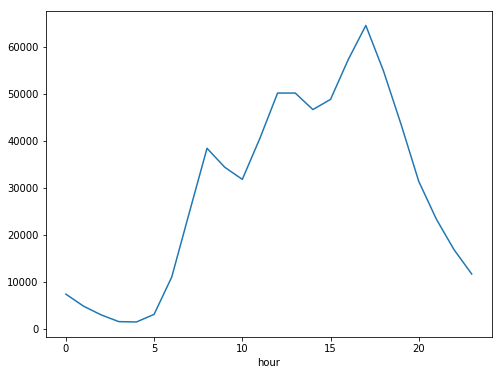

In [30]:
df.groupby(['hour'])['dayName'].count().plot.line(figsize = (8, 6))

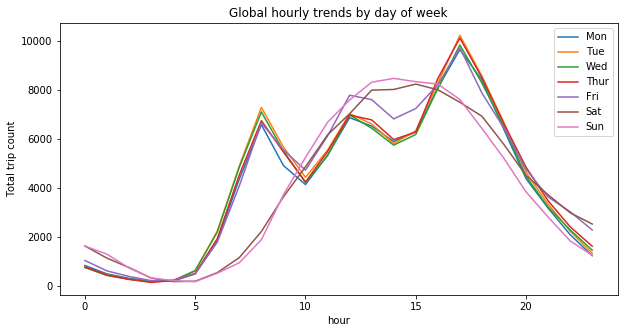

In [31]:
mon_df.groupby(['hour'])['dayName'].count().plot.line(figsize = (10, 5), label='Mon')
tue_df.groupby(['hour'])['dayName'].count().plot.line(figsize = (10, 5), label='Tue')
wed_df.groupby(['hour'])['dayName'].count().plot.line(figsize = (10, 5), label='Wed')
thur_df.groupby(['hour'])['dayName'].count().plot.line(figsize = (10, 5), label='Thur')
fri_df.groupby(['hour'])['dayName'].count().plot.line(figsize = (10, 5), label='Fri')
sat_df.groupby(['hour'])['dayName'].count().plot.line(figsize = (10, 5), label='Sat')
sun_df.groupby(['hour'])['dayName'].count().plot.line(figsize = (10, 5), label='Sun')

plt.ylabel('Total trip count')
plt.title('Global hourly trends by day of week')
plt.legend();

Each station must have its own temporal profile, a characteristic time-series that says something about how and when that station is used.  If a station peaks early in the weekday morning and then never again, it could mean that this stations primary purpose is transporting people to work. Likewise if a station peaks at 6pm but never again then it could be considered an evening commute station. Other patterns might also exists that lend themselves to easy interpretation.

- Most of the trips start after work hours (between 17.00 and 19.00)
- Lunch time is also active (between 12.00 and 14.00)
- Trip again peaks at 6pm considering an evening commute.   
- It seems everybody sleeps after midnight, between 00.00 and 07.00 is the least active time.

In [32]:
df.start_station.unique()

array([3047, 3005, 3023, 3051, 3007, 3075, 3066, 3082, 3064, 3052, 3029,
       3006, 3018, 3035, 3032, 3030, 3074, 3022, 3069, 3042, 3026, 3054,
       3079, 3024, 3038, 3037, 3062, 3068, 3058, 3067, 3040, 3055, 3036,
       3056, 3060, 3008, 3031, 3034, 3063, 3077, 3048, 3049, 3016, 3014,
       3011, 3076, 3033, 4108, 3027, 3019, 3046, 3010, 3020, 3025, 3080,
       3028, 3065, 3057, 3045, 3081, 3078, 4155, 4156, 4176, 4150, 4177,
       4151, 4169, 4148, 4170, 4162, 4143, 4142, 3061, 4163, 4157, 4183,
       4181, 4138, 4165, 4144, 4159, 4146, 4160, 4167, 3039, 4147, 4149,
       4153, 4158, 4154, 4152, 4174, 4166, 4125, 4136, 4134, 4129, 4132,
       4133, 4126, 4127, 4130, 4180, 4194, 4131, 4135, 3013, 4205, 4212,
       4208, 4206, 4207, 4214, 4216, 4210, 4215, 4209, 4211, 4202, 4204,
       4213, 4220, 4227, 4244, 4254, 4249, 4248, 4246, 4250, 4245, 4267,
       4273, 4266, 4276, 4275, 4293, 4304, 4306, 4315, 4313, 4311, 4344,
       4346, 4314, 4352, 4348, 4342, 4343, 4300, 43

In [33]:
# def get_base_map(df):
#     return folium.Map(location=[df.start_lat.mean(),
#                              df.start_lon.mean()],
#                    zoom_start=14,
#                    tiles='cartodbpositron')

# #base map
# base = get_base_map(df)
# base

In [34]:
df = df.rename(columns={'start_station': 'Station_ID'})

In [35]:
df.head()

,bike_id,bike_type,duration,end_lat,end_lon,end_station,end_time,passholder_type,plan_duration,start_lat,start_lon,Station_ID,start_time,trip_id,trip_route_category,Date,dayName,hour,minute
0,4727,0,18,34.048500,-118.258537,3005,2017-06-25 20:11:00,Monthly Pass,30,34.039982,-118.266403,3047,2017-06-25 19:53:00,32815764,One Way,2017-06-25 19:53:00,6,19,53
1,4727,0,25,34.031052,-118.267090,3020,2017-06-25 21:00:00,Monthly Pass,30,34.048500,-118.258537,3005,2017-06-25 20:35:00,32821341,One Way,2017-06-25 20:35:00,6,20,35
2,4727,0,10,34.048500,-118.258537,3005,2017-06-16 08:51:00,Monthly Pass,30,34.050911,-118.240967,3023,2017-06-16 08:41:00,31652471,One Way,2017-06-16 08:41:00,4,8,41
3,4727,0,4,34.045422,-118.253517,3051,2017-06-16 17:43:00,Monthly Pass,30,34.048500,-118.258537,3005,2017-06-16 17:39:00,31700167,One Way,2017-06-16 17:39:00,4,17,39
4,4727,0,17,34.048500,-118.258537,3005,2017-06-16 20:34:00,Walk-up,0,34.045422,-118.253517,3051,2017-06-16 20:17:00,31717085,One Way,2017-06-16 20:17:00,4,20,17


In [36]:
# def add_station_markers(initial_map, df):
#     #station location visualization
#     statdf = df.drop_duplicates(subset=['Station_ID'])
#     out_map = initial_map
#     for lat, lon, name in zip(statdf['start_lat'], statdf['start_lon'], statdf['Station_ID']):
#         out_map.add_child(folium.Marker(location=[lat,lon], popup=(folium.Popup(name, max_width=1000, ))))
#     return out_map

# markers = add_station_markers(base, df)
# markers

In [37]:
stations_df = pd.read_csv('Data/metro-bike-share-stations-2019-07-01.csv')
stations_df.head()

,Station_ID,Station_Name,Go_live_date,Region,Status
0,3000,Virtual Station,7/7/2016,NaN,Active
1,3005,7th & Flower,7/7/2016,Central LA,Active
2,3006,Olive & 8th,7/7/2016,Central LA,Active
3,3007,5th & Grand,7/7/2016,Central LA,Active
4,3008,Figueroa & 9th,7/7/2016,Central LA,Active


In [38]:
stations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 5 columns):
Station_ID      206 non-null int64
Station_Name    206 non-null object
Go_live_date    206 non-null object
Region          205 non-null object
Status          206 non-null object
dtypes: int64(1), object(4)
memory usage: 8.1+ KB


In [39]:
stations_df = stations_df.loc[~stations_df['Region '].isna()]

In [40]:
stations_df.isna().sum()

Station_ID      0
Station_Name    0
Go_live_date    0
Region          0
Status          0
dtype: int64

In [41]:
# df = df.rename(columns={'start_station': 'Station_ID'})
# rename features to merge them 
merged_df = df.merge(stations_df, how='left', on='Station_ID')
merged_df = merged_df.rename(columns={'Station_ID': 'starting_station_id',
                                     'Station_Name': 'station_name_start',
                                     'Region ': 'region_start'})

merged_df = merged_df.rename(columns={'end_station': 'Station_ID'})
merged_df = merged_df.merge(stations_df, on='Station_ID', how='left')
merged_df = merged_df.rename(columns={'Station_ID': 'ending_station_id',
                                     'Station_Name': 'station_name_end',
                                     'Region ': 'region_end'})

In [42]:
print(merged_df.shape)
merged_df.columns

(702376, 27)


Index(['bike_id', 'bike_type', 'duration', 'end_lat', 'end_lon',
       'ending_station_id', 'end_time', 'passholder_type', 'plan_duration',
       'start_lat', 'start_lon', 'starting_station_id', 'start_time',
       'trip_id', 'trip_route_category', 'Date', 'dayName', 'hour', 'minute',
       'station_name_start', 'Go_live_date_x', 'region_start', 'Status_x',
       'station_name_end', 'Go_live_date_y', 'region_end', 'Status_y'],
      dtype='object')

In [43]:
del merged_df['Go_live_date_x'], merged_df['Go_live_date_y'], merged_df['Status_x'], merged_df['Status_y']

In [44]:
merged_df.columns

Index(['bike_id', 'bike_type', 'duration', 'end_lat', 'end_lon',
       'ending_station_id', 'end_time', 'passholder_type', 'plan_duration',
       'start_lat', 'start_lon', 'starting_station_id', 'start_time',
       'trip_id', 'trip_route_category', 'Date', 'dayName', 'hour', 'minute',
       'station_name_start', 'region_start', 'station_name_end', 'region_end'],
      dtype='object')

In [45]:
merged_df.head()

,bike_id,bike_type,duration,end_lat,end_lon,ending_station_id,end_time,passholder_type,plan_duration,start_lat,...,trip_id,trip_route_category,Date,dayName,hour,minute,station_name_start,region_start,station_name_end,region_end
0,4727,0,18,34.048500,-118.258537,3005,2017-06-25 20:11:00,Monthly Pass,30,34.039982,...,32815764,One Way,2017-06-25 19:53:00,6,19,53,Pico & Flower,Central LA,7th & Flower,Central LA
1,4727,0,25,34.031052,-118.267090,3020,2017-06-25 21:00:00,Monthly Pass,30,34.048500,...,32821341,One Way,2017-06-25 20:35:00,6,20,35,7th & Flower,Central LA,Hill & Washington,Central LA
2,4727,0,10,34.048500,-118.258537,3005,2017-06-16 08:51:00,Monthly Pass,30,34.050911,...,31652471,One Way,2017-06-16 08:41:00,4,8,41,1st & Judge John Aiso,Central LA,7th & Flower,Central LA
3,4727,0,4,34.045422,-118.253517,3051,2017-06-16 17:43:00,Monthly Pass,30,34.048500,...,31700167,One Way,2017-06-16 17:39:00,4,17,39,7th & Flower,Central LA,7th & Broadway,Central LA
4,4727,0,17,34.048500,-118.258537,3005,2017-06-16 20:34:00,Walk-up,0,34.045422,...,31717085,One Way,2017-06-16 20:17:00,4,20,17,7th & Broadway,Central LA,7th & Flower,Central LA


In [46]:
merged_df['route'] = merged_df.station_name_start + '-->' + merged_df.station_name_end

In [47]:
merged_df.head()

,bike_id,bike_type,duration,end_lat,end_lon,ending_station_id,end_time,passholder_type,plan_duration,start_lat,...,trip_route_category,Date,dayName,hour,minute,station_name_start,region_start,station_name_end,region_end,route
0,4727,0,18,34.048500,-118.258537,3005,2017-06-25 20:11:00,Monthly Pass,30,34.039982,...,One Way,2017-06-25 19:53:00,6,19,53,Pico & Flower,Central LA,7th & Flower,Central LA,Pico & Flower-->7th & Flower
1,4727,0,25,34.031052,-118.267090,3020,2017-06-25 21:00:00,Monthly Pass,30,34.048500,...,One Way,2017-06-25 20:35:00,6,20,35,7th & Flower,Central LA,Hill & Washington,Central LA,7th & Flower-->Hill & Washington
2,4727,0,10,34.048500,-118.258537,3005,2017-06-16 08:51:00,Monthly Pass,30,34.050911,...,One Way,2017-06-16 08:41:00,4,8,41,1st & Judge John Aiso,Central LA,7th & Flower,Central LA,1st & Judge John Aiso-->7th & Flower
3,4727,0,4,34.045422,-118.253517,3051,2017-06-16 17:43:00,Monthly Pass,30,34.048500,...,One Way,2017-06-16 17:39:00,4,17,39,7th & Flower,Central LA,7th & Broadway,Central LA,7th & Flower-->7th & Broadway
4,4727,0,17,34.048500,-118.258537,3005,2017-06-16 20:34:00,Walk-up,0,34.045422,...,One Way,2017-06-16 20:17:00,4,20,17,7th & Broadway,Central LA,7th & Flower,Central LA,7th & Broadway-->7th & Flower


In [48]:
print(merged_df.region_start.unique())
print(merged_df.shape)

['Central LA' nan 'Pasadena' 'Port of LA' 'Westside']
(702376, 24)


In [49]:
merged_df = merged_df.loc[~merged_df['region_start'].isna()]

In [50]:
merged_df = merged_df.loc[merged_df['region_start'] == 'Central LA']

In [51]:
# drop Port of LA in region_start feature 
# merged_df.drop(merged_df[merged_df['region_start'] == 'Port of LA'].index, inplace=True)

In [52]:
print(merged_df.region_start.unique())
merged_df.shape

['Central LA']


(534568, 24)

In [53]:
merged_df.route.nunique()

6638

In [129]:
merged_df.tail(10)

,bike_id,bike_type,duration,end_lat,end_lon,ending_station_id,end_time,passholder_type,plan_duration,start_lat,...,trip_route_category,Date,dayName,hour,minute,station_name_start,region_start,station_name_end,region_end,route
702359,19779,electric,14,34.048851,-118.246422,3029,9/30/2019 22:55,Monthly Pass,30,34.074829,...,One Way,2019-09-30 22:41:00,0,22,41,Park & Echo Park,Central LA,Main & 4th,Central LA,Park & Echo Park-->Main & 4th
702362,5784,standard,6,34.062580,-118.290092,4304,9/30/2019 22:49,Monthly Pass,30,34.069271,...,One Way,2019-09-30 22:43:00,0,22,43,Kenmore & 3rd,Central LA,Shatto Pl & Wilshire,Central LA,Kenmore & 3rd-->Shatto Pl & Wilshire
702365,18348,electric,1440,34.048500,-118.258537,3005,10/2/2019 6:17,One Day Pass,1,34.041130,...,One Way,2019-09-30 22:59:00,0,22,59,Figueroa & Pico,Central LA,7th & Flower,Central LA,Figueroa & Pico-->7th & Flower
702366,18897,electric,2,34.063351,-118.296799,4410,9/30/2019 23:03,Monthly Pass,30,34.059689,...,One Way,2019-09-30 23:01:00,0,23,1,7th & Berendo,Central LA,Kenmore & 6th,Central LA,7th & Berendo-->Kenmore & 6th
702368,6677,standard,5,34.062580,-118.290092,4304,9/30/2019 23:09,Monthly Pass,30,34.069271,...,One Way,2019-09-30 23:04:00,0,23,4,Kenmore & 3rd,Central LA,Shatto Pl & Wilshire,Central LA,Kenmore & 3rd-->Shatto Pl & Wilshire
702370,18984,electric,23,34.075611,-118.291862,4401,9/30/2019 23:38,Monthly Pass,30,34.075611,...,Round Trip,2019-09-30 23:15:00,0,23,15,Vermont & Beverly,Central LA,Vermont & Beverly,Central LA,Vermont & Beverly-->Vermont & Beverly
702372,19655,electric,8,34.064281,-118.238937,3078,9/30/2019 23:40,Walk-up,1,34.046822,...,One Way,2019-09-30 23:32:00,0,23,32,Main & 5th,Central LA,Hill & College,Central LA,Main & 5th-->Hill & College
702373,18984,electric,15,34.075611,-118.291862,4401,9/30/2019 23:53,Monthly Pass,30,34.075611,...,Round Trip,2019-09-30 23:38:00,0,23,38,Vermont & Beverly,Central LA,Vermont & Beverly,Central LA,Vermont & Beverly-->Vermont & Beverly
702374,12361,standard,1,34.045181,-118.250237,3067,9/30/2019 23:41,Annual Pass,365,34.046822,...,One Way,2019-09-30 23:40:00,0,23,40,Main & 5th,Central LA,Main & 6th,Central LA,Main & 5th-->Main & 6th
702375,16580,electric,22,34.056969,-118.253593,3049,10/1/2019 0:03,Annual Pass,365,34.045181,...,One Way,2019-09-30 23:41:00,0,23,41,Main & 6th,Central LA,2nd & Figueroa,Central LA,Main & 6th-->2nd & Figueroa


# Time Series Analysis

In [54]:
ts_hourly_df = pd.DataFrame(merged_df.groupby(['Date','starting_station_id','dayName', 'hour']).count()['route'])
print(ts_hourly_df.shape)
ts_hourly_df.head()

(512865, 1)


route
Date                starting_station_id dayName hour       
2017-04-01 00:08:00 3033                5       0         1
2017-04-01 00:09:00 3033                5       0         1
                    3035                5       0         1
2017-04-01 00:10:00 3035                5       0         1
2017-04-01 00:11:00 3035                5       0         1

In [ ]:
temp_hour = time_series_df.resample('H')
ts_hourly = temp_hour.count()

In [ ]:
ts_hourly = ts_hourly[['route']]
ts_hourly

In [63]:
merged_df.head()

,bike_id,bike_type,duration,end_lat,end_lon,ending_station_id,end_station_id,end_time,passholder_type,plan_duration,...,trip_route_category,Date,dayName,hour,minute,station_name_start,region_start,station_name_end,region_end,route
32894,4727,0,18,34.048500,-118.258537,3005.0,0.0,2017-06-25 20:11:00,Monthly Pass,30.0,...,One Way,2017-06-25 19:53:00,6,19,53,Pico & Flower,Central LA,7th & Flower,Central LA,Pico & Flower-->7th & Flower
32895,4727,0,25,34.031052,-118.267090,3020.0,0.0,2017-06-25 21:00:00,Monthly Pass,30.0,...,One Way,2017-06-25 20:35:00,6,20,35,7th & Flower,Central LA,Hill & Washington,Central LA,7th & Flower-->Hill & Washington
32896,4727,0,10,34.048500,-118.258537,3005.0,0.0,2017-06-16 08:51:00,Monthly Pass,30.0,...,One Way,2017-06-16 08:41:00,4,8,41,1st & Judge John Aiso,Central LA,7th & Flower,Central LA,1st & Judge John Aiso-->7th & Flower
32897,4727,0,4,34.045422,-118.253517,3051.0,0.0,2017-06-16 17:43:00,Monthly Pass,30.0,...,One Way,2017-06-16 17:39:00,4,17,39,7th & Flower,Central LA,7th & Broadway,Central LA,7th & Flower-->7th & Broadway
32898,4727,0,17,34.048500,-118.258537,3005.0,0.0,2017-06-16 20:34:00,Walk-up,0.0,...,One Way,2017-06-16 20:17:00,4,20,17,7th & Broadway,Central LA,7th & Flower,Central LA,7th & Broadway-->7th & Flower


In [55]:
# def subset_station(station, df):
#     """function to match the station and set Date feature as index 
#     to resample by hour and count trip and rename Date as ds and route as y"""
#     df1 = df.copy()
#     df1 = df1[df1['starting_station_id'] == station]
#     df1['Date'] = pd.to_datetime(df1['Date'])
#     df1.set_index('Date', inplace=True)
#     df1 = df1.resample('H').count()
#     df1 = df1.reset_index()
#     df1.rename(columns={'Date': 'ds', 'route': 'y'}, inplace=True)
#     df1 = df1[['ds', 'y']]
#     return df1


In [56]:
# subset_station(3014, merged_df).tail()

In [57]:
# def prophet_m(station, df):   
#     """function to run prophet model for all stations"""
#     Model = proph(interval_width=0.95, yearly_seasonality=True) 
#     date_value_df = subset_station(station, df)
#     Model.fit(date_value_df)
#     future_dates = Model.make_future_dataframe(periods=1500, freq='H')
#     forecast = Model.predict(future_dates)
    
#     return forecast
    
#     for i in forecast:
#         ds = i['ds'].iloc[0]
#         y_hat = i['yhat'].values[0]
#         y_hat_lower = i['yhat_lower'].values[0]
#         y_hat_upper = i['yhat_upper'].values[0]

#     return (ds, y_hat, y_hat_lower, y_hat_upper)


In [58]:
# prophet_m(3014, merged_df)

In [59]:
# stations = [3014, 3030]

# def all_station_preds(stations):
#     station_ = []
#     ds = []
#     y_hat = []
# #     y_hat_lower = []
# #     y_hat_upper = []
#     for station in stations:
#         p = prophet_m(station, merged_df)
#         ds.extend(p.ds.values)
#         y_hat.extend(p.yhat.values)
# #         y_hat_lower.extend(p.y_hat_lower.values)
# #         y_hat_upper.extend(p.y_hat_upper.values)
#         station_.extend(np.repeat(str(station), p.shape[0]))

#     results = pd.DataFrame({'station': station_,
#                             'ds': ds,
#                             'y_hat': y_hat})

#     return results
    
    
#                             'y_hat_lower': y_hat_lower,
#                             'y_hat_upper': y_hat_upper    
# ds, y_hat, y_hat_lower, y_hat_upper = prophet_m(station, merged_df)


### Most of 4000 bike stations located outside of center of LA downtown. Taking stations_id that are below 4000

In [128]:
stations_below_4000 = merged_df.loc[merged_df['starting_station_id']<4000]
print(stations_below_4000.starting_station_id.nunique())
stations = stations_below_4000['starting_station_id'].unique()

60


### Use start_station_preds function to run prophet model on stations_below_4000

In [131]:
station_pred_df = start_station_preds(stations)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [107]:
station_pred_df.head()

,station,ds,y_hat
0,3047,2017-04-01 08:00:00,0.438787
1,3047,2017-04-01 09:00:00,0.403700
2,3047,2017-04-01 10:00:00,0.357246
3,3047,2017-04-01 11:00:00,0.359014
4,3047,2017-04-01 12:00:00,0.394343


### Select predicted dates. Save it as Pickle 

In [132]:
station_pred_df.set_index('ds', inplace=True)

In [133]:
station_pred_df = station_pred_df['2019-10-20':]

In [134]:
station_pred_df.head()

,station,y_hat
ds,,
2019-10-20 00:00:00,3047,0.113799
2019-10-20 01:00:00,3047,0.109348
2019-10-20 02:00:00,3047,0.012696
2019-10-20 03:00:00,3047,-0.100173
2019-10-20 04:00:00,3047,-0.107917


In [135]:
station_pred_df.reset_index(inplace=True)

In [71]:
import pickle

In [136]:
with open('station_pred_df1.pickle', 'wb') as f:
    pickle.dump(station_pred_df, f) 

In [311]:
with open('station_pred_df1.pickle', 'rb') as f:
    station_pred_df1 = pickle.load(f)

In [114]:
station_pred_df.tail(10)

,ds,station,y_hat
70609,2019-12-10 03:00:00,3078,0.019469
70610,2019-12-10 04:00:00,3078,0.016200
70611,2019-12-10 05:00:00,3078,0.056909
70612,2019-12-10 06:00:00,3078,0.127420
70613,2019-12-10 07:00:00,3078,0.192793
70614,2019-12-10 08:00:00,3078,0.220758
70615,2019-12-10 09:00:00,3078,0.204663
70616,2019-12-10 10:00:00,3078,0.167752
70617,2019-12-10 11:00:00,3078,0.145604
70618,2019-12-10 12:00:00,3078,0.161019


In [492]:
# station_pred_df1['2019-']

In [118]:
def subset_ending_station(station, df):
    """function to match the station and set Date feature as index 
    to resample by hour and count trip and rename Date as ds and route as y"""
    df1 = df.copy()
    df1 = df1[df1['ending_station_id'] == station]
    df1['Date'] = pd.to_datetime(df1['Date'])
    df1.set_index('Date', inplace=True)
    df1 = df1.resample('H').count()
    df1 = df1.reset_index()
    df1.rename(columns={'Date': 'ds', 'route': 'y'}, inplace=True)
    df1 = df1[['ds', 'y']]
    return df1

In [119]:
def prophet_ending_m(station, df):   
    """function to run prophet model for all ending stations"""
    Model = proph(interval_width=0.95) 
    date_value_df = subset_ending_station(station, df)
    Model.fit(date_value_df)
    future_dates = Model.make_future_dataframe(periods=1500, freq='H')
    forecast = Model.predict(future_dates)
    
    return forecast

In [120]:
stations = stations_below_4000['starting_station_id'].unique()
# stations = [3014, 3030]
def end_station_preds(stations):
    station_ = []
    ds = []
    y_hat = []
#     y_hat_lower = []
#     y_hat_upper = []
    for station in stations:
        p = prophet_ending_m(station, merged_df)
        ds.extend(p.ds.values)
        y_hat.extend(p.yhat.values)
#         y_hat_lower.extend(p.y_hat_lower.values)
#         y_hat_upper.extend(p.y_hat_upper.values)
        station_.extend(np.repeat(str(station), p.shape[0]))

    results = pd.DataFrame({'station': station_,
                            'ds': ds,
                            'y_hat': y_hat})

    return results
    

In [121]:
end_station_pred_df = end_station_preds(stations)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [122]:
end_station_pred_df.tail()

,station,ds,y_hat
1368379,3078,2019-12-02 07:00:00,0.134180
1368380,3078,2019-12-02 08:00:00,0.106732
1368381,3078,2019-12-02 09:00:00,0.097160
1368382,3078,2019-12-02 10:00:00,0.125822
1368383,3078,2019-12-02 11:00:00,0.180957


In [137]:
end_station_pred_df.set_index('ds', inplace=True)

In [138]:
end_station_pred_df = end_station_pred_df['2019-10-20':] 
end_station_pred_df.reset_index(inplace=True)

In [139]:
end_station_pred_df.head()

,ds,station,y_hat
0,2019-10-20 00:00:00,3047,0.198661
1,2019-10-20 01:00:00,3047,0.152021
2,2019-10-20 02:00:00,3047,0.042458
3,2019-10-20 03:00:00,3047,-0.072891
4,2019-10-20 04:00:00,3047,-0.110280


In [140]:
with open('end_station_pred_df.pickle', 'wb') as f:
    pickle.dump(end_station_pred_df, f) 

In [100]:
!ls

Data                             end_station_pred_df.pickle
EDA_FoliumMap.ipynb              functions.py
LICENSE                          heatmaptime_animation.html
Live_station_status.ipynb        heatmaptimes.html
README.md                        history
TimeSeries_BikeStation.ipynb     markers.html
capstone_EDA.ipynb               station_name.csv
capstone_TimeSeries-Copy1.ipynb  station_name.json
capstone_TimeSeries.ipynb        station_pred_df1.pickle
capstone_TimeSeries_hourly.ipynb


In [496]:
# pd.DataFrame({'station': station_,
#                     'ds': ds,
#                     'y_hat': y_hat,
#                     'y_hat_lower': y_hat_lower,
#                     'y_hat_upper': y_hat_upper})

In [168]:
# pred_df = pd.DataFrame(predictions)
# pred_df.head()

,0
0,ds yhat 19688 2019...
1,ds yhat 19690 2019...


In [118]:
# predictions

[{'station': 3014,
  'ds': Timestamp('2017-04-01 12:00:00'),
  'y_hat': -0.3239757641800053,
  'y_hat_lower': -3.5033398918989147,
  'y_hat_upper': 2.802783994728268},
 {'station': 3030,
  'ds': Timestamp('2017-04-01 10:00:00'),
  'y_hat': 0.4428558000607171,
  'y_hat_lower': -2.62718920007741,
  'y_hat_upper': 3.516718511688994}]

In [119]:
# pred_df = pd.DataFrame(predictions)

In [120]:
# pred_df

,ds,station,y_hat,y_hat_lower,y_hat_upper
0,2017-04-01 12:00:00,3014,-0.323976,-3.503340,2.802784
1,2017-04-01 10:00:00,3030,0.442856,-2.627189,3.516719


# Monthly on 1 trip or Station

In [88]:
# popular_route = merged_df.loc[(merged_df['route']=='Union Station West Portal-->Main & 1st') | 
#                               (merged_df['route']=='Main & 1st-->Union Station West Portal')]

popular_route = merged_df.loc[(merged_df['route']=='Union Station West Portal-->Main & 1st')]
print(popular_route.columns)
print(popular_route.shape)
popular_route.head(3)


Index(['bike_id', 'bike_type', 'duration', 'end_lat', 'end_lon',
       'ending_station_id', 'end_station_id', 'end_time', 'passholder_type',
       'plan_duration', 'start_lat', 'start_lon', 'starting_station_id',
       'start_station_id', 'start_time', 'trip_id', 'trip_route_category',
       'Date', 'dayName', 'hour', 'minute', 'station_name_start',
       'region_start', 'station_name_end', 'region_end', 'route'],
      dtype='object')
(5769, 26)


,bike_id,bike_type,duration,end_lat,end_lon,ending_station_id,end_station_id,end_time,passholder_type,plan_duration,...,trip_route_category,Date,dayName,hour,minute,station_name_start,region_start,station_name_end,region_end,route
33168,5715,0,4,34.051941,-118.24353,3030.0,0.0,2017-06-27 04:40:00,Monthly Pass,30.0,...,One Way,2017-06-27 04:36:00,1,4,36,Union Station West Portal,Central LA,Main & 1st,Central LA,Union Station West Portal-->Main & 1st
33414,5722,0,6,34.051941,-118.24353,3030.0,0.0,2017-05-05 18:36:00,Walk-up,0.0,...,One Way,2017-05-05 18:30:00,4,18,30,Union Station West Portal,Central LA,Main & 1st,Central LA,Union Station West Portal-->Main & 1st
33688,5725,0,6,34.051941,-118.24353,3030.0,0.0,2017-05-22 12:07:00,Flex Pass,365.0,...,One Way,2017-05-22 12:01:00,0,12,1,Union Station West Portal,Central LA,Main & 1st,Central LA,Union Station West Portal-->Main & 1st


In [89]:
popular_route['Date'] = pd.to_datetime(popular_route['Date'])
popular_route.set_index('Date', inplace=True)

/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [90]:
temp = popular_route.resample('MS')
ts_monthly = temp.count()

In [83]:
print("2017 Q2 total trip:", ts_monthly['route']['2017-04-01':'2017-06-01'].sum())
print("2018 Q2 total trip:", ts_monthly['route']['2018-04-01':'2018-06-01'].sum())
# print("2018 Q1 total trip:", ts_monthly1['route']['2019-01-01':'2019-03-01'].sum())
print(f"In 2018 Q2 Demand increased by: {round((1118/542)*50,2)}%")
print("\n")
print("2017 Q3 total trip:", ts_monthly['route']['2017-07-01':'2017-09-01'].sum())
print("2018 Q3 total trip:", ts_monthly['route']['2018-07-01':'2018-09-01'].sum())
print(f"In 2018 Q3 Demand increased by: {round((1705/742)*50,2)}%")
print("\n")
print("2017 Q4 total trip:", ts_monthly['route']['2017-10-01':'2017-12-01'].sum())
print("2018 Q4 total trip:", ts_monthly['route']['2018-10-01':'2018-12-01'].sum())
print(f"In 2018 Q4 Demand increased by: {round((2021/804)*50,2)}%")
print("\n")
print("2018 Q1 total trip:", ts_monthly['route']['2018-01-01':'2018-03-01'].sum())
print("2019 Q1 total trip:", ts_monthly['route']['2019-01-01':'2019-03-01'].sum())
print(f"In 2019 Q1 Demand increased by: {round((1895/767)*50,2)}%")
print("\n")
print("2018 Q2 total trip:", ts_monthly['route']['2018-04-01':'2018-06-01'].sum())
print("2019 Q2 total trip:", ts_monthly['route']['2019-04-01':'2019-06-01'].sum())
print(f"In 2019 Q2 Demand increased by: {round((2913/1376)*50,2)}%")

2017 Q2 total trip: 260
2018 Q2 total trip: 545
In 2018 Q2 Demand increased by: 103.14%


2017 Q3 total trip: 371
2018 Q3 total trip: 842
In 2018 Q3 Demand increased by: 114.89%


2017 Q4 total trip: 389
2018 Q4 total trip: 1009
In 2018 Q4 Demand increased by: 125.68%


2018 Q1 total trip: 380
2019 Q1 total trip: 891
In 2019 Q1 Demand increased by: 123.53%


2018 Q2 total trip: 545
2019 Q2 total trip: 1082
In 2019 Q2 Demand increased by: 105.85%


In [388]:
# temp_hour = popular_route.resample('H')
# ts_hourly = temp_hour.count()

# ts_hourly = ts_hourly[['route']]
# ts_hourly

In [90]:
# fig, ax = plt.subplots(figsize=(14, 5))
# ax.plot(ts_hourly['2019-06-10':'2019-06-14'].index, ts_hourly['2019-06-10':'2019-06-14']['route'])

In [91]:
# print(ts_hourly['2019-06-14'])
# fig, ax = plt.subplots(figsize=(14, 5))
# ax.plot(ts_hourly['2019-06-14'].index, ts_hourly['2019-06-14']['route'])

In [92]:
ts_monthly = ts_monthly[['route']]
ts_monthly.tail()

,route
Date,
2019-02-01,275
2019-03-01,316
2019-04-01,321
2019-05-01,382
2019-06-01,379


In [97]:
popular_route['2019-05']['route'].value_counts()


Union Station West Portal-->Main & 1st    382
Name: route, dtype: int64

In [85]:
ts_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27 entries, 2017-04-01 to 2019-06-01
Freq: MS
Data columns (total 1 columns):
route    27 non-null int64
dtypes: int64(1)
memory usage: 1.7 KB


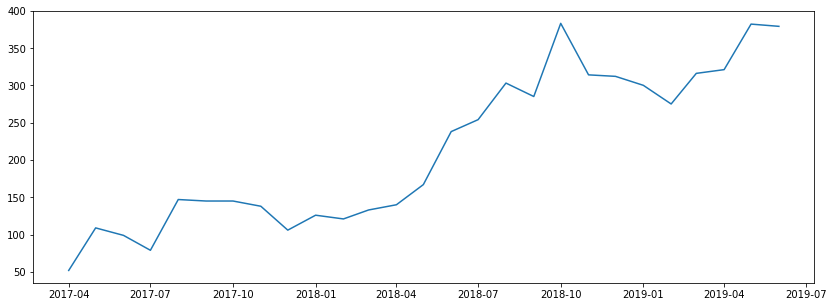

In [67]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(ts_monthly.index, ts_monthly['route'])

In [95]:
# dfST['timestamp'] = pd.to_datetime(dfST['timestamp'])

In [96]:
# popular_route_count = pd.DataFrame(popular_route.groupby(
#     ['Date'])['route'].count()).reset_index()

In [97]:
# popular_route_count

In [68]:
ts_monthly.reset_index(inplace=True)

In [69]:
ts_df = ts_monthly.rename(columns={'Date': 'ds',
                        'route': 'y'})

ts_df.tail()

,ds,y
22,2019-02-01,275
23,2019-03-01,316
24,2019-04-01,321
25,2019-05-01,382
26,2019-06-01,379


In [72]:
Model = proph(interval_width=0.95) 
Model.fit(ts_df)
future_dates = Model.make_future_dataframe(periods=6, freq='MS')
forecast = Model.predict(future_dates)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 20.


In [73]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend']].tail(12)

,ds,yhat,yhat_lower,yhat_upper,trend
21,2019-01-01,295.647888,268.960691,322.714508,295.421620
22,2019-02-01,279.148073,252.697816,305.073074,310.263659
23,2019-03-01,327.513761,302.312720,354.286986,323.669372
24,2019-04-01,319.889994,293.890803,344.866255,338.511411
25,2019-05-01,369.383663,343.843807,394.841342,352.874675
26,2019-06-01,389.370740,363.744352,415.569543,367.716714
27,2019-07-01,466.480797,439.967491,492.712950,382.079977
28,2019-08-01,468.993480,444.098483,496.549198,396.922016
29,2019-09-01,411.375560,388.070731,437.718301,411.764056
30,2019-10-01,589.688725,563.767852,614.208992,426.127319


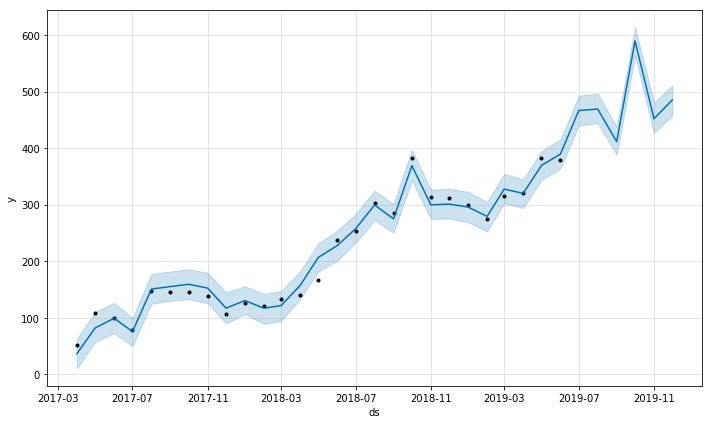

In [74]:
Model.plot(forecast, uncertainty=True)
plt.show()

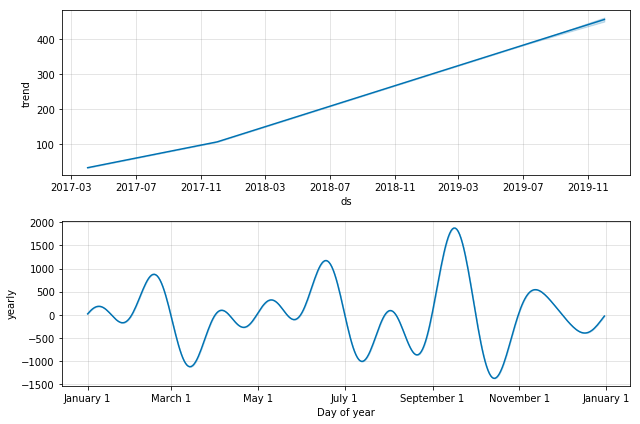

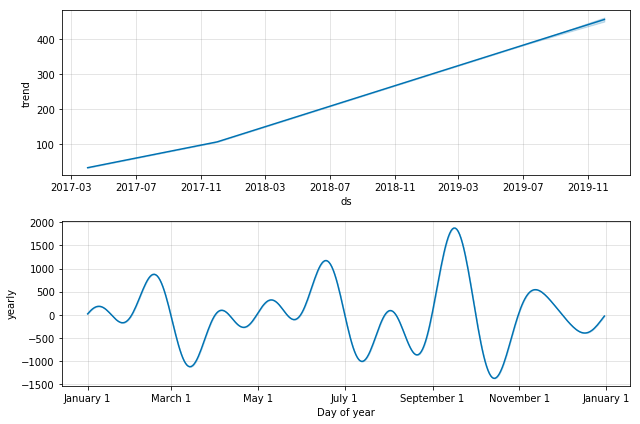

In [75]:
Model.plot_components(forecast)

In [674]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(Model, horizon = "30 days")
df_p = performance_metrics(df_cv)
df_p.head(5)


INFO:fbprophet:Making 29 forecasts with cutoffs between 2018-04-05 00:00:00 and 2019-05-30 00:00:00
INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,coverage
0,3 days,82.094098,9.060579,7.674960,0.735632
1,4 days,72.260181,8.500599,7.108886,0.804598
2,5 days,69.989322,8.365962,6.910217,0.816092
3,6 days,77.046502,8.777614,6.967627,0.816092
4,7 days,80.831001,8.990606,7.124882,0.758621


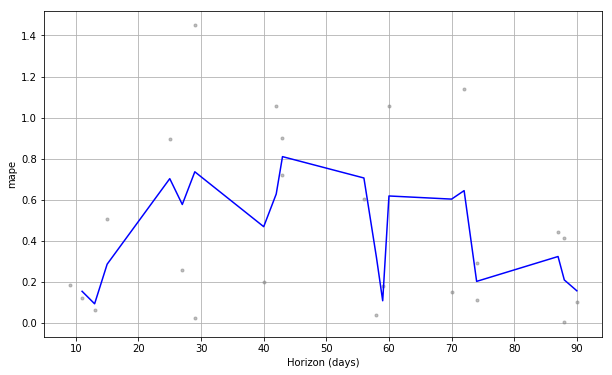

In [661]:
from fbprophet.plot import plot_cross_validation_metric
fig0 = plot_cross_validation_metric(df_cv, metric='mape')

# Time Series Modeling on Daily 

In [86]:
temp_day = popular_route.resample('D')
ts_daily = temp_day.count()

ts_daily = ts_daily[['route']]
ts_daily.head()

,route
Date,
2017-04-03,1
2017-04-04,2
2017-04-05,5
2017-04-06,4
2017-04-07,4


In [87]:
# split by days
mon_ts = ts_daily['route']['2017-04-03'::7]
tue_ts = ts_daily['route']['2017-04-04'::7]
wed_ts = ts_daily['route']['2017-04-05'::7]
thu_ts = ts_daily['route']['2017-04-06'::7]
fri_ts = ts_daily['route']['2017-04-07'::7]
sat_ts = ts_daily['route']['2017-04-08'::7]
sun_ts = ts_daily['route']['2017-04-09'::7]

In [88]:
sun_ts.index.dayofweek.value_counts()

6    116
Name: Date, dtype: int64

In [89]:
# Sum all days
print(mon_ts.sum())
print(tue_ts.sum())
print(wed_ts.sum())
print(thu_ts.sum())
print(fri_ts.sum())
print(sat_ts.sum())
print(sun_ts.sum())

1019
1247
1277
1206
988
17
15


Seems there are no demand during the weekend

In [611]:
# print("2018 q1:",ts_daily['route']['2017-01-01':'2019-03-26':7].mean())
# print("2018 q2:",ts_daily['route']['2018-04-02':'2018-06-25':7].mean())
# print("2019 q1:",ts_daily['route']['2019-01-07':'2019-03-25':7].mean())
# print("2019 q2:",ts_daily['route']['2019-04-01'::7].mean())

In [612]:
# pd.DataFrame(ts_daily['route']['2019-01-07':'2019-03-25':7])

In [90]:
ts_daily_prophet = ts_daily.reset_index()

In [91]:
ts_daily_df = ts_daily_prophet.rename(columns={'Date': 'ds',
                        'route': 'y'})

ts_daily_df.head()

,ds,y
0,2017-04-03,1
1,2017-04-04,2
2,2017-04-05,5
3,2017-04-06,4
4,2017-04-07,4


In [601]:
# ts_daily_df['dayName'] = pd.DatetimeIndex(ts_daily_df['ds']).weekday

In [624]:
# ts_daily_df

In [92]:
# Drop route = 0 which are most likely to be weekend and holidays
# only commuters uses bikes for this route and there are almost no demand during the
# weekend and Holidays
ts_daily_df1 = ts_daily_df.loc[~(ts_daily_df['y']<1)]

In [93]:
ts_daily_df1.shape

(587, 2)

In [94]:
Model = proph(interval_width=0.95, daily_seasonality=True) 
Model.fit(ts_daily_df1)
future_dates = Model.make_future_dataframe(periods=90, freq='D')
forecast = Model.predict(future_dates)

In [98]:
# print(forecast.columns)
forecast[['ds', 'yhat']].tail()

,ds,yhat
672,2019-09-23,21.836143
673,2019-09-24,23.204945
674,2019-09-25,23.212745
675,2019-09-26,22.672148
676,2019-09-27,20.804590


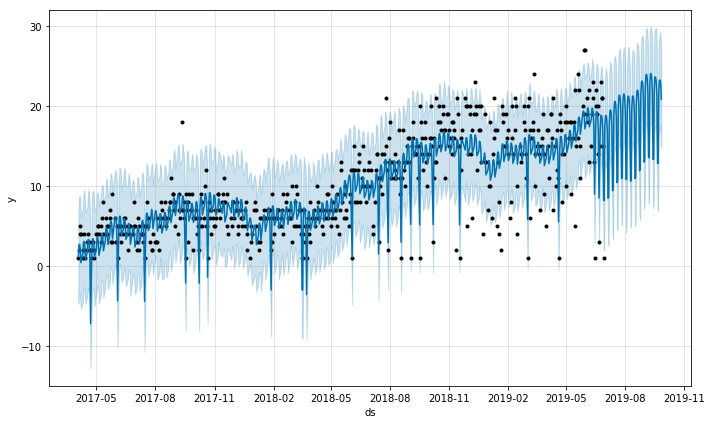

In [99]:
Model.plot(forecast, uncertainty=True)
plt.show()

In [100]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(Model, horizon='90 days')
df_p = performance_metrics(df_cv)
df_p.shape
df_p.head(5)

INFO:fbprophet:Making 9 forecasts with cutoffs between 2018-04-05 00:00:00 and 2019-03-31 00:00:00


,horizon,mse,rmse,mae,mape,coverage
0,10 days,10.093511,3.177029,2.488949,0.318256,0.805419
1,11 days,8.699025,2.949411,2.352359,0.216243,0.839080
2,12 days,9.555573,3.091209,2.461630,0.232862,0.824713
3,13 days,11.620069,3.408822,2.601675,0.263851,0.793103
4,14 days,13.714118,3.703258,2.820674,0.329055,0.771552


In [770]:
# df_cv

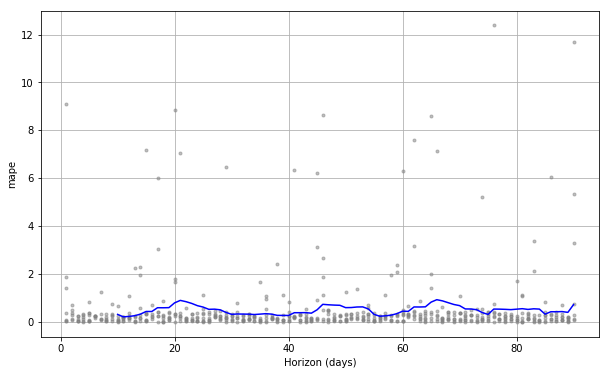

In [101]:
from fbprophet.plot import plot_cross_validation_metric
fig1 = plot_cross_validation_metric(df_cv, metric='mape')

In [757]:
# m1 = proph(interval_width=0.95, seasonality_mode='multiplicative') 
# m1.fit(ts_daily_df1[ts_daily_df['ds'].apply(lambda x: x.weekday())>=5])
# future = m1.make_future_dataframe(periods=90, freq='D')
# fcst1 = m1.predict(future)

# m2 = proph(interval_width=0.95, seasonality_mode='multiplicative') 
# m2.fit(ts_daily_df1[ts_daily_df['ds'].apply(lambda x: x.weekday())<5])
# future = m2.make_future_dataframe(periods=90, freq='D')
# fcst2 = m2.predict(future)
# fcst2 = fcst2.append(fcst1)

# fig=m2.plot(fcst2)

In [758]:
# df_cv1 = cross_validation(m2, horizon='90 days')
# df_p = performance_metrics(df_cv1)
# df_p.shape
# df_p.head(5)

In [759]:
# fig2 = plot_cross_validation_metric(df_cv1, metric='mape')

In [195]:
popular_route1 = popular_route.loc[(popular_route['dayName']>=0) & (popular_route['dayName']<5)]
popular_route1.dayName.unique()

array([1, 4, 0, 2, 3])

# Hourly Time Series

In [343]:
temp_hour = popular_route.resample('H')
ts_hourly = temp_hour.count()

ts_hourly = ts_hourly[['route']]
ts_hourly.head()

,route
Date,
2017-04-03 08:00:00,1
2017-04-03 09:00:00,0
2017-04-03 10:00:00,0
2017-04-03 11:00:00,0
2017-04-03 12:00:00,0


In [344]:
ts_hourly_prophet = ts_hourly.reset_index()
ts_hourly_prophet1 = ts_hourly_prophet.rename(columns={'Date': 'ds',
                        'route': 'y'})

ts_hourly_prophet1.tail(24)


,ds,y
19584,2019-06-28 08:00:00,3
19585,2019-06-28 09:00:00,0
19586,2019-06-28 10:00:00,1
19587,2019-06-28 11:00:00,0
19588,2019-06-28 12:00:00,0
19589,2019-06-28 13:00:00,0
19590,2019-06-28 14:00:00,0
19591,2019-06-28 15:00:00,0
19592,2019-06-28 16:00:00,0
19593,2019-06-28 17:00:00,0


In [345]:
# ts_hourly_prophet1['hour'] = pd.DatetimeIndex(ts_hourly_prophet1['ds']).hour
# ts_hourly_prophet1['dayName'] = pd.DatetimeIndex(ts_hourly_prophet1['ds']).weekday

In [347]:
# ts_hourly_prophet1 = ts_hourly_prophet1.loc[~(ts_hourly_prophet1['y']<1)]

In [348]:
Model = proph(interval_width=0.95, daily_seasonality=True)

Model.fit(ts_hourly_prophet1)
future_dates = Model.make_future_dataframe(periods=180, freq='H')
forecast = Model.predict(future_dates)

In [340]:
# forecast_pred = forecast[['ds', 'yhat']]
# forecast_pred['hour'] = pd.DatetimeIndex(forecast_pred['ds']).hour
# forecast_pred['dayName'] = pd.DatetimeIndex(forecast_pred['ds']).weekday

In [301]:
# forecast_pred.set_index('ds', inplace=True)

In [292]:
# forecast_pred_june = forecast_pred['2019-05']

In [432]:
# forecast_pred_june.groupby(['hour']).count()['yhat']

In [349]:
forecast[['ds', 'yhat']].tail()

,ds,yhat
19783,2019-07-06 15:00:00,-0.013809
19784,2019-07-06 16:00:00,-0.183299
19785,2019-07-06 17:00:00,-0.200016
19786,2019-07-06 18:00:00,-0.060666
19787,2019-07-06 19:00:00,0.055849


In [350]:
# ts_hourly_prophet1.tail(16)

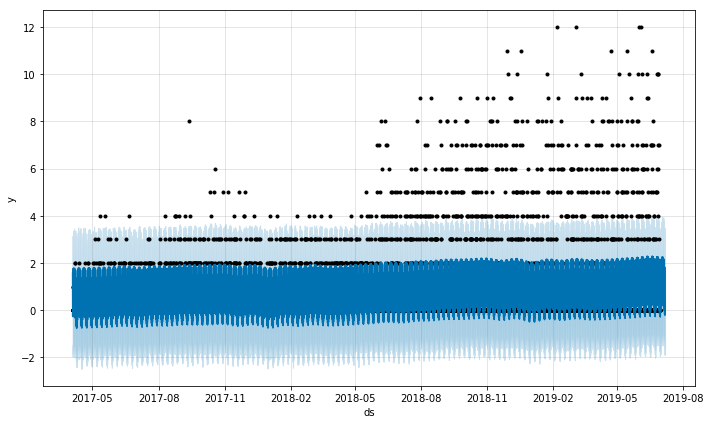

In [351]:
Model.plot(forecast, uncertainty=True)
plt.show()

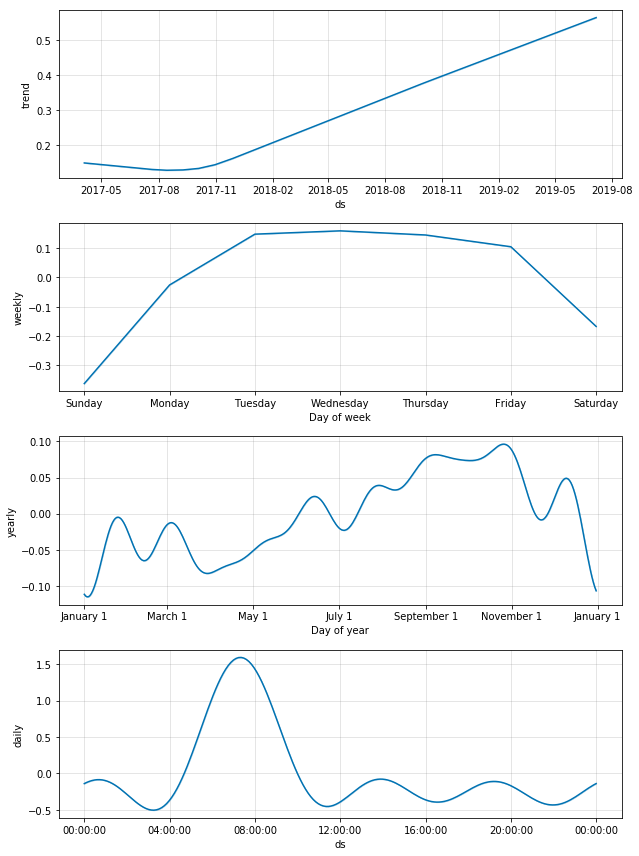

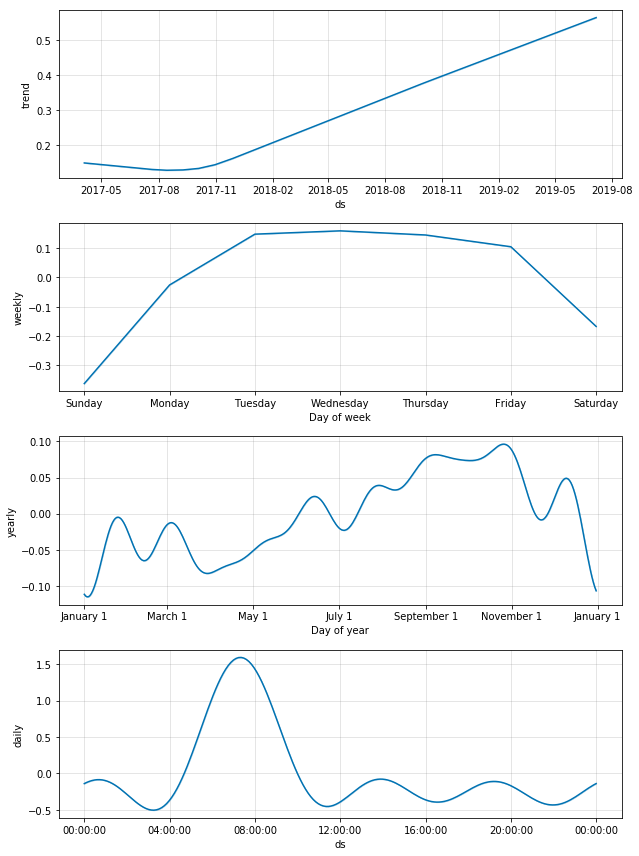

In [352]:
Model.plot_components(forecast)

In [164]:
df_cv = cross_validation(Model, horizon='90 days')
df_p = performance_metrics(df_cv)
df_p.shape
df_p.head(5)

INFO:fbprophet:Making 9 forecasts with cutoffs between 2018-04-05 07:00:00 and 2019-03-31 07:00:00


,horizon,mse,rmse,mae,mape,coverage
0,9 days 19:00:00,1.823738,1.350458,1.020793,0.605985,0.893907
1,9 days 22:00:00,1.805836,1.343814,1.016838,0.607048,0.896774
2,9 days 23:00:00,1.818239,1.348421,1.021331,0.615274,0.899642
3,10 days 00:00:00,2.003032,1.415285,1.059972,0.608189,0.885305
4,10 days 01:00:00,1.957364,1.399058,1.048450,0.594724,0.888889


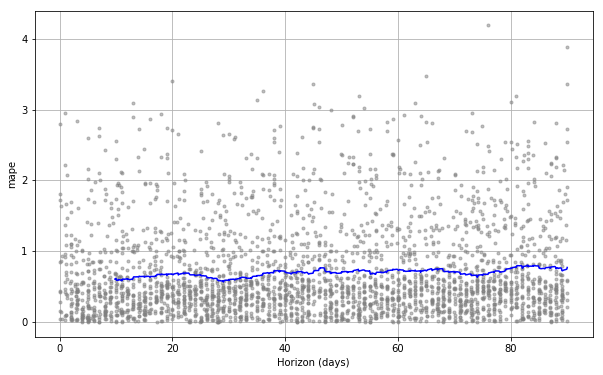

In [165]:
fig1 = plot_cross_validation_metric(df_cv, metric='mape')

In [333]:
station_pred_df1.tail()

,station,ds,y_hat
17995,3078.0,2019-10-06 18:00:00,0.408277
17996,3078.0,2019-10-06 19:00:00,0.371387
17997,3078.0,2019-10-06 20:00:00,0.326630
17998,3078.0,2019-10-06 21:00:00,0.282961
17999,3078.0,2019-10-06 22:00:00,0.251276


# Scraping Live status of stations  

In [314]:
import requests
response = requests.get("https://bikeshare.metro.net/stations/json/", headers={'User-Agent': 'Mozilla/5.0'})
stations = response.json()

In [394]:
stations['features'][0]['properties']

{'addressStreet': '723 Flower Street',
 'addressCity': 'Los Angeles',
 'addressState': 'CA',
 'addressZipCode': '90017',
 'bikesAvailable': 21,
 'closeTime': '05:39:00',
 'docksAvailable': 5,
 'eventEnd': None,
 'eventStart': None,
 'isEventBased': False,
 'isVirtual': False,
 'isVisible': False,
 'kioskId': 3005,
 'kioskPublicStatus': 'Active',
 'kioskStatus': 'FullService',
 'name': '7th & Flower',
 'notes': None,
 'openTime': '05:45:00',
 'publicText': '',
 'timeZone': 'Pacific Standard Time',
 'totalDocks': 27,
 'trikesAvailable': 0,
 'kioskConnectionStatus': 'Active',
 'kioskType': 1,
 'latitude': 34.0485,
 'longitude': -118.25854,
 'hasGeofence': False,
 'classicBikesAvailable': 20,
 'smartBikesAvailable': 0,
 'electricBikesAvailable': 1,
 'isArchived': False}

In [384]:
from time import time

time()

1569459308.685971

In [423]:
def get_live_station(url):
    
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    stations = response.json()
    
    output = []
    
    for station in stations['features']:
        dict_keys = ['kioskId', 'bikesAvailable', 'docksAvailable', 'name', 'latitude', 'longitude']
        data = {k : station['properties'][k] for k in dict_keys}
        data['time'] = time()
        output.append(data)

    return pd.DataFrame(output)

In [470]:
live_station_df = get_live_station("https://bikeshare.metro.net/stations/json/")
live_station_df.head()

,bikesAvailable,docksAvailable,kioskId,latitude,longitude,name,time
0,14,12,3005,34.04850,-118.25854,7th & Flower,1.569521e+09
1,10,14,3006,34.04554,-118.25667,Olive & 8th,1.569521e+09
2,9,14,3007,34.05048,-118.25459,5th & Grand,1.569521e+09
3,7,8,3008,34.04661,-118.26273,Figueroa & 9th,1.569521e+09
4,5,17,3010,34.03705,-118.25487,11th & Maple,1.569521e+09


In [471]:
live_station_df.time = live_station_df.time.astype(str)
live_station_df.time = live_station_df.time.str[:10]
# live_station_df.time = live_station_df.time.astype(int)
live_station_df.head()

,bikesAvailable,docksAvailable,kioskId,latitude,longitude,name,time
0,14,12,3005,34.04850,-118.25854,7th & Flower,1569521383
1,10,14,3006,34.04554,-118.25667,Olive & 8th,1569521383
2,9,14,3007,34.05048,-118.25459,5th & Grand,1569521383
3,7,8,3008,34.04661,-118.26273,Figueroa & 9th,1569521383
4,5,17,3010,34.03705,-118.25487,11th & Maple,1569521383


In [472]:
live_station_df['time'] = pd.to_datetime(live_station_df['time'], unit='s')
live_station_df.head(10)

,bikesAvailable,docksAvailable,kioskId,latitude,longitude,name,time
0,14,12,3005,34.04850,-118.25854,7th & Flower,2019-09-26 18:09:43
1,10,14,3006,34.04554,-118.25667,Olive & 8th,2019-09-26 18:09:43
2,9,14,3007,34.05048,-118.25459,5th & Grand,2019-09-26 18:09:43
3,7,8,3008,34.04661,-118.26273,Figueroa & 9th,2019-09-26 18:09:43
4,5,17,3010,34.03705,-118.25487,11th & Maple,2019-09-26 18:09:43
5,3,16,3011,34.04113,-118.26798,Figueroa & Pico,2019-09-26 18:09:43
6,4,25,3014,34.05661,-118.23721,Union Station West Portal,2019-09-26 18:09:43
7,21,9,3016,34.05290,-118.24156,Los Angeles & Temple,2019-09-26 18:09:43
8,9,12,3018,34.04373,-118.26014,Grand & Olympic,2019-09-26 18:09:43
9,15,4,3019,34.03861,-118.26086,12th & Hill,2019-09-26 18:09:43


In [474]:
live_station_df.rename(columns={'time':'ds'}, inplace=True)
live_station_df.set_index('ds', inplace=True)
live_station_df.head()

,bikesAvailable,docksAvailable,kioskId,latitude,longitude,name
ds,,,,,,
2019-09-26 18:09:43,14,12,3005,34.04850,-118.25854,7th & Flower
2019-09-26 18:09:43,10,14,3006,34.04554,-118.25667,Olive & 8th
2019-09-26 18:09:43,9,14,3007,34.05048,-118.25459,5th & Grand
2019-09-26 18:09:43,7,8,3008,34.04661,-118.26273,Figueroa & 9th
2019-09-26 18:09:43,5,17,3010,34.03705,-118.25487,11th & Maple


In [475]:
live_station_df.index = live_station_df.index.map(lambda x: x.replace(second=0))
live_station_df.index = live_station_df.index.map(lambda x: x.replace(minute=0))
# live_station_df.reset_index(inplace=True)
live_station_df.head()
 

,bikesAvailable,docksAvailable,kioskId,latitude,longitude,name
ds,,,,,,
2019-09-26 18:00:00,14,12,3005,34.04850,-118.25854,7th & Flower
2019-09-26 18:00:00,10,14,3006,34.04554,-118.25667,Olive & 8th
2019-09-26 18:00:00,9,14,3007,34.05048,-118.25459,5th & Grand
2019-09-26 18:00:00,7,8,3008,34.04661,-118.26273,Figueroa & 9th
2019-09-26 18:00:00,5,17,3010,34.03705,-118.25487,11th & Maple


In [483]:
live_station_df.kioskId = live_station_df.kioskId.astype(str)
live_station_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2019-09-26 18:00:00 to 2019-09-26 18:00:00
Data columns (total 6 columns):
bikesAvailable    183 non-null int64
docksAvailable    183 non-null int64
kioskId           183 non-null object
latitude          183 non-null float64
longitude         183 non-null float64
name              183 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 10.0+ KB


In [479]:
station_pred_df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18000 entries, 2019-09-24 13:00:00 to 2019-10-06 22:00:00
Data columns (total 2 columns):
station    18000 non-null object
y_hat      18000 non-null float64
dtypes: float64(1), object(1)
memory usage: 421.9+ KB


In [481]:
station_pred_df1.station = station_pred_df1.station.str[:4]

In [484]:
station_pred_df1.head()

,station,y_hat
ds,,
2019-09-24 13:00:00,3047,0.439309
2019-09-24 14:00:00,3047,0.432759
2019-09-24 15:00:00,3047,0.434784
2019-09-24 16:00:00,3047,0.498354
2019-09-24 17:00:00,3047,0.608555


In [485]:
live_station_df.reset_index(inplace=True)
station_pred_df1.reset_index(inplace=True)

In [491]:
# live_station_df['id'] = live_station_df.ds + ' ' + live_station_df.kioskId
# live_station_df.head()

# Stations Demand for each hour
Business problem to solve is to recommend allocations for bikes in certain (popular) location by looking at 
hourly demand for each station.  Find each stations demand volume per hour and see if there is surplus 
that can be allocate those surplus bikes to popular location in order to support the demand

For Users, display live status of stations and display availability of bikes and display how many bikes will be remaining after hour. 

In [360]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier


In [361]:
merged_df.set_index('Date', inplace=True)

In [362]:
train_df = pd.DataFrame(train.groupby(['starting_station_id','dayName', 'hour']).count()['route'])

NameError: name 'train' is not defined

In [363]:
test_df = pd.DataFrame(test.groupby(['starting_station_id','dayName', 'hour']).count()['route'])

NameError: name 'test' is not defined

In [364]:
# df_oneHotEncode = merged_df[['starting_station_id','dayName', 'hour']]

In [365]:
# new_df = pd.DataFrame(merged_df.groupby(['starting_station_id','dayName', 'hour']).count()['route'])

In [366]:
train_df.head()

NameError: name 'train_df' is not defined

In [367]:
train_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)

NameError: name 'train_df' is not defined

In [368]:
train_df.head()

NameError: name 'train_df' is not defined

In [369]:
test_df.head()

NameError: name 'test_df' is not defined

In [370]:
train_df.rename(columns={'route': 'trip_count'}, inplace=True)
test_df.rename(columns={'route': 'trip_count'}, inplace=True)

NameError: name 'train_df' is not defined

In [371]:
# del train_df['index']
# del test_df['index']
train_df.head()

NameError: name 'train_df' is not defined

In [372]:
train_df = train_df.astype({'starting_station_id': str, 
                            'dayName': str,
                            'hour': str})

test_df = test_df.astype({'starting_station_id': str, 
                            'dayName': str,
                            'hour': str})


NameError: name 'train_df' is not defined

In [373]:
def onehotencode(X):
    """
    One hot encode the categorical variables in the dataframe to convert them to numerical variables.
    """
    X_obj = X[[col for col,dtype in list(zip(X.columns, X.dtypes)) 
                          if dtype == np.dtype('O')]]
    
    X_nonobj = X[[col for col,dtype in list(zip(X.columns, X.dtypes)) 
                          if dtype != np.dtype('O')]]
    
    ohe = OneHotEncoder(handle_unknown='ignore')
    X_obj_ohe = ohe.fit_transform(X_obj)
    
    X_nonobj_df = pd.DataFrame(X_nonobj).reset_index(drop=True) 
    X_obj_ohe_df = pd.DataFrame(X_obj_ohe.todense(), columns=ohe.get_feature_names()).reset_index(drop=True)
    
    X_all = pd.concat([X_nonobj_df, X_obj_ohe_df], axis=1)
   
    return X_all

In [374]:
test_df_onehot, ohe = onehotencode(test_df)

NameError: name 'test_df' is not defined

In [375]:
train_df_onehot = pd.DataFrame(ohe.transform(train_df.drop('trip_count', axis=1)).todense(), 
                               columns=ohe.get_feature_names()).reset_index(drop=True)


NameError: name 'ohe' is not defined

In [377]:
train_df_onehot.head()

NameError: name 'train_df_onehot' is not defined

In [356]:
print(train_df['starting_station_id'].nunique())
print(test_df['starting_station_id'].nunique())

120
149


In [368]:
X_train = train_df_onehot
y_train = train_df['trip_count']

In [373]:
X_test = test_df_onehot.drop('trip_count', axis=1)
y_test = test_df_onehot['trip_count']

In [374]:
lr = LinearRegression()

In [375]:
model = lr.fit(X_train, y_train)

In [376]:
y_predict = model.predict(X_test)

In [376]:
from sklearn.metrics import mean_squared_error

preds = lr.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, preds))


In [385]:
lr.score(X_train, y_train)

0.5256628863836941

In [386]:
lr.score(X_test, y_test)

-1.3371040495456073e+23

# Test, Train from all data

In [353]:
new_df = pd.DataFrame(merged_df.groupby(['starting_station_id','dayName', 'hour']).count()['route'])
new_df = new_df.reset_index()

In [354]:
new_df = new_df.astype({'starting_station_id': str, 
                            'dayName': str,
                            'hour': str})
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20633 entries, 0 to 20632
Data columns (total 4 columns):
starting_station_id    20633 non-null object
dayName                20633 non-null object
hour                   20633 non-null object
route                  20633 non-null int64
dtypes: int64(1), object(3)
memory usage: 644.9+ KB


In [355]:
X = new_df.drop('route', axis=1)
y = new_df['route']

In [356]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

NameError: name 'train_test_split' is not defined

In [357]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)

NameError: name 'LinearRegression' is not defined

In [358]:
y_predicts = model.predict(X_test)

lr.score(X_train, y_train)

NameError: name 'model' is not defined

In [359]:
lr.score(X_test, y_test)

NameError: name 'lr' is not defined

In [360]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, RandomForestRegressor

In [361]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [362]:
pred = tree_clf.predict(X_test)
# print(confusion_matrix(y_test, pred))
# print(classification_report(y_test, pred))

In [363]:
forest = RandomForestRegressor(n_estimators=100, max_depth=5)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [364]:
forest.score(X_train, y_train)

0.45668590709381224

In [365]:
forest.score(X_test, y_test)

0.36835129929628996

# One hot Encode train & test

In [370]:
df_onehotencode = onehotencode(new_df)

In [373]:
df_onehotencode.shape

(20633, 219)

In [374]:
X = df_onehotencode.drop('route', axis=1)
y = df_onehotencode['route']

In [402]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

lr = LinearRegression()
model = lr.fit(X_train, y_train)

In [403]:
y_predicts = model.predict(X_test)

print("train", lr.score(X_train, y_train))
print("test", lr.score(X_test, y_test))

train 0.5421966495177516
test 0.47754250683701316


In [404]:
forest = RandomForestRegressor(n_estimators=100, max_depth=5)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [405]:
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

0.3126091070449105
0.2909035282756547


In [413]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_clf.fit(X_train, y_train)
pred = tree_clf.predict(X_test)

In [414]:
accuracy_score(y_test, pred)

0.13036103707293434

In [418]:
scoring = 'accuracy'
score = cross_val_score(tree_clf, X_train, y_train, cv=10, n_jobs=1, scoring=scoring)
print(score)

/anaconda3/envs/learn-env/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning:

The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.



[0.11339093 0.11938601 0.12177986 0.1241791  0.12689739 0.12871287
 0.13111669 0.13337588 0.13329041 0.13615635]


In [211]:
df_oneHotEncode['starting_station_id'] = df_oneHotEncode.starting_station_id.astype(str)
# df_oneHotEncode['hour'] = df_oneHotEncode.hour.astype(str)

/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [212]:
df_oneHotEncode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601543 entries, 32894 to 648509
Data columns (total 4 columns):
starting_station_id    601543 non-null object
Date                   601543 non-null datetime64[ns]
dayName                601543 non-null int64
hour                   601543 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 22.9+ MB


In [367]:
def onehotencode(X):
    """
    One hot encode the categorical variables in the dataframe to convert them to numerical variables.
    """
    X_obj = X[[col for col,dtype in list(zip(X.columns, X.dtypes)) 
                          if dtype == np.dtype('O')]]
    
    X_nonobj = X[[col for col,dtype in list(zip(X.columns, X.dtypes)) 
                          if dtype != np.dtype('O')]]
    
    ohe = OneHotEncoder(handle_unknown='ignore')
    X_obj_ohe = ohe.fit_transform(X_obj)
    
    X_nonobj_df = pd.DataFrame(X_nonobj).reset_index(drop=True) 
    X_obj_ohe_df = pd.DataFrame(X_obj_ohe.todense(), columns=ohe.get_feature_names()).reset_index(drop=True)
    
    X_all = pd.concat([X_nonobj_df, X_obj_ohe_df], axis=1)
   
    return X_all

In [214]:
df_onehot = onehotencode(df_oneHotEncode)

In [215]:
df_oneHotEncode['hour'] = df_oneHotEncode.hour.astype(str)

/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [216]:
df_oneHotEncode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601543 entries, 32894 to 648509
Data columns (total 4 columns):
starting_station_id    601543 non-null object
Date                   601543 non-null datetime64[ns]
dayName                601543 non-null int64
hour                   601543 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 22.9+ MB


In [217]:
df_onehot.set_index('Date', inplace=True)

In [218]:
df_onehot.head()

,dayName,hour,x0_3005.0,x0_3006.0,x0_3007.0,x0_3008.0,x0_3010.0,x0_3011.0,x0_3014.0,x0_3016.0,...,x0_4390.0,x0_4396.0,x0_4397.0,x0_4400.0,x0_4401.0,x0_4404.0,x0_4405.0,x0_4408.0,x0_4409.0,x0_4410.0
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-25 19:53:00,6,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-25 20:35:00,6,20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-16 08:41:00,4,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-16 17:39:00,4,17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-16 20:17:00,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [244]:
merged_df.head().T

,32894,32895,32896,32897,32898
bike_id,4727,4727,4727,4727,4727
bike_type,0,0,0,0,0
duration,18,25,10,4,17
end_lat,34.0485,34.0311,34.0485,34.0454,34.0485
end_lon,-118.259,-118.267,-118.259,-118.254,-118.259
ending_station_id,3005,3020,3005,3051,3005
end_station_id,0,0,0,0,0
end_time,2017-06-25 20:11:00,2017-06-25 21:00:00,2017-06-16 08:51:00,2017-06-16 17:43:00,2017-06-16 20:34:00
passholder_type,Monthly Pass,Monthly Pass,Monthly Pass,Monthly Pass,Walk-up
plan_duration,30,30,30,30,0


In [241]:
X = df_onehot['2017':'2018']
y = df_onehot['2019']

In [899]:
# test_mon = df_onehot['2019-04-01'::7]

In [219]:
df_onehot

(601543, 189)

In [232]:
94/6362

0.014775227915749764

In [239]:
# test_mon = test_mon.reset_index()
# df_onehot.groupby(['hour']).mean()['x0_3014.0']

In [231]:
df_onehot.groupby(['hour']).sum()['x0_3014.0']

hour
0       94.0
1       90.0
2      157.0
3       42.0
4       80.0
5      237.0
6     1939.0
7     3754.0
8     3445.0
9     1528.0
10     819.0
11     734.0
12     723.0
13     566.0
14     512.0
15     583.0
16     758.0
17     859.0
18     924.0
19     659.0
20     333.0
21     316.0
22     279.0
23     151.0
Name: x0_3014.0, dtype: float64

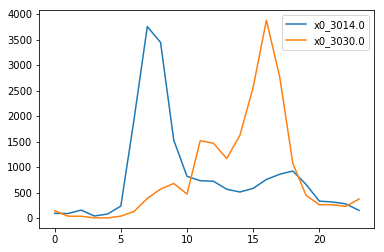

In [893]:
plt.plot(df_onehot.groupby(['hour']).sum()['x0_3014.0'])
plt.plot(df_onehot.groupby(['hour']).sum()['x0_3030.0'])
plt.legend()

In [431]:
# df_onehot.groupby(['hour']).sum().loc[6]
# .min().sort_values(ascending=False)

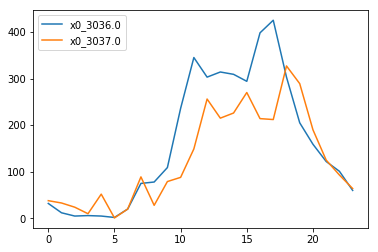

In [926]:
plt.plot(df_onehot.groupby(['hour']).sum()['x0_3036.0'])
plt.plot(df_onehot.groupby(['hour']).sum()['x0_3037.0'])
plt.legend()

In [111]:
merged_df.head()

,bike_id,bike_type,duration,end_lat,end_lon,ending_station_id,end_station_id,end_time,passholder_type,plan_duration,...,trip_id,trip_route_category,dayName,hour,minute,station_name_start,region_start,station_name_end,region_end,route
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-25 19:53:00,4727,0,18,34.048500,-118.258537,3005.0,0.0,2017-06-25 20:11:00,Monthly Pass,30.0,...,32815764,One Way,6,19,53,Pico & Flower,Central LA,7th & Flower,Central LA,Pico & Flower-->7th & Flower
2017-06-25 20:35:00,4727,0,25,34.031052,-118.267090,3020.0,0.0,2017-06-25 21:00:00,Monthly Pass,30.0,...,32821341,One Way,6,20,35,7th & Flower,Central LA,Hill & Washington,Central LA,7th & Flower-->Hill & Washington
2017-06-16 08:41:00,4727,0,10,34.048500,-118.258537,3005.0,0.0,2017-06-16 08:51:00,Monthly Pass,30.0,...,31652471,One Way,4,8,41,1st & Judge John Aiso,Central LA,7th & Flower,Central LA,1st & Judge John Aiso-->7th & Flower
2017-06-16 17:39:00,4727,0,4,34.045422,-118.253517,3051.0,0.0,2017-06-16 17:43:00,Monthly Pass,30.0,...,31700167,One Way,4,17,39,7th & Flower,Central LA,7th & Broadway,Central LA,7th & Flower-->7th & Broadway
2017-06-16 20:17:00,4727,0,17,34.048500,-118.258537,3005.0,0.0,2017-06-16 20:34:00,Walk-up,0.0,...,31717085,One Way,4,20,17,7th & Broadway,Central LA,7th & Flower,Central LA,7th & Broadway-->7th & Flower


In [106]:
pivot_df = merged_df[['station_name_start', 'dayName', 'hour']]

In [109]:
pivot_df_transform = pivot_df.pivot_table(index='station_name_start', 
                     columns=['dayName', 'hour'],
                    aggfunc='size').T

In [432]:
pivot_df_transform.head()

station_name_start   Expo/Sepulveda Expo Line Station  11th & Maple  \
dayName hour                                                          
0       0                                         NaN           NaN   
        1                                         NaN           NaN   
        2                                         NaN           1.0   
        3                                         NaN           3.0   
        4                                         NaN           NaN   

station_name_start  12th & Hill  17th St / SMC Expo Line Station  \
dayName hour                                                       
0       0                   6.0                              2.0   
        1                   2.0                              1.0   
        2                   2.0                              NaN   
        3                   NaN                              NaN   
        4                   NaN                              NaN   

station_name_start  18th & Figueroa  18th & San Pedro  1st & Central  \
dayName hour                                                           
0       0                       NaN               3.0           26.0   
        1                       3.0               NaN           18.0   
        2                       3.0               NaN            5.0   
        3                       NaN               NaN            4.0   
        4                       NaN               NaN            6.0   

station_name_start  1st & Judge John Aiso  25th & Vermont  28th & Figueroa  \
dayName hour                                                                 
0       0                             8.0             NaN              NaN   
        1                             6.0             NaN              NaN   
        2                            10.0             NaN              NaN   
        3                            10.0             NaN              NaN   
        4                             1.0             NaN              NaN   

station_name_start       ...         Vermont & Beverly  Vermont & Vermont Pl  \
dayName hour             ...                                                   
0       0                ...                       NaN                   NaN   
        1                ...                       NaN                   NaN   
        2                ...                       NaN                   NaN   
        3                ...                       NaN                   NaN   
        4                ...                       NaN                   NaN   

station_name_start  Villa Parke  Washington & Abbot Kinney  Westlake & 3rd  \
dayName hour                                                                 
0       0                   5.0                        1.0             NaN   
        1                   NaN                        NaN             NaN   
        2                   NaN                        NaN             NaN   
        3                   NaN                        NaN             NaN   
        4                   NaN                        NaN             NaN   

station_name_start  Westlake/Macarthur Park Station  Westwood & National  \
dayName hour                                                               
0       0                                       NaN                  NaN   
        1                                       NaN                  NaN   
        2                                       NaN                  NaN   
        3                                       NaN                  NaN   
        4                                       NaN                  NaN   

station_name_start  Willow St & Mateo St  Wilshire & Witmer  Windward & Main  
dayName hour                                                                  
0       0                            NaN                4.0              4.0  
        1                            2.0                NaN              2.0  
        2       

In [130]:
pivot_df_transform.T[0][8].sort_values(ascending=False)

station_name_start
Union Station West Portal                                 627.0
1st & Central                                             310.0
Traction & Rose                                           233.0
7th & Flower                                              223.0
7th & Spring                                              199.0
Main & 6th                                                190.0
Spring & College                                          176.0
Hope & 11th                                               172.0
Main & 5th                                                149.0
Grand & 7th                                               145.0
Grand & 3rd                                               123.0
Wilshire & Witmer                                         122.0
Park & Echo Park                                          115.0
7th & Main                                                114.0
2nd & Figueroa                                            111.0
Main & 1st           

In [120]:
pivot_df_transform.T[0][6].sort_values(ascending=True)[0:50]

station_name_start
Rose Bowl                          1.0
Lake & Merrett                     1.0
Lake & Union                       1.0
Los Robles & Cordova               1.0
Palms & National                   1.0
Rose & Rennie                      1.0
Factory Place & Alameda            1.0
Severance & Adams                  1.0
Grand / LATTC                      1.0
Temple & Vignes                    1.0
Union & 7th                        1.0
Venice & Glendon                   1.0
25th & Vermont                     1.0
Figueroa & McCarthy Way            1.0
Westlake & 3rd                     1.0
17th St / SMC Expo Line Station    1.0
Lake & Locust                      1.0
Kenmore & 3rd                      1.0
Grand & Washington                 2.0
Fair Oaks & Mercantile Alley       2.0
Imperial & 7th                     2.0
Union & Olympic                    2.0
Venice & Lincoln                   2.0
Willow St & Mateo St               2.0
Shatto Pl & Wilshire               2.0
Del Ma

In [125]:
pivot_df_transform.T[0][6].sort_values(ascending=True)['3rd & Santa Fe']

8.0